# PROJET ENERGIE - PRE-PROCESSING AU NIVEAU NATIONAL
**Objectifs** : Suite aux constats établis lors des étapes précédentes, vous devrez nettoyer votre jeu de données, et si besoin le transformer et l’enrichir.
L’objectif à la fin de cette étape est d’avoir un dataset prêt pour effectuer des analyses approfondies et/ou une modélisation à l’aide de Machine Learning.

**Affichage du fichier de données :**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Lecture du fichier consommation et Affichage**

In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Energie/eco2mix-regional-cons-def.csv', sep=';')
df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Suppression de la dernière colonne qui est vide :**

In [ ]:
#Suppression de la colonne Column 30 qui est une colonne vide
df = df.drop("Column 30", axis = 1)

**Suppression des 12 premières colonnes qui ne possèdent que des NaN :**

In [ ]:
import numpy as np
variables_numeriques = df.select_dtypes(include=['int']).columns
df = df.dropna(axis=0, how='all', subset=variables_numeriques)

**Suppression des valeurs manquantes pour les colonnes 'Nucléaire (MW)' et 'Eolien (MW)' :**

In [ ]:
#Remplacement des valeurs manquantes pour les colonnes nucléaire et éolien par la valeur 0
df['Nucléaire (MW)'] = df['Nucléaire (MW)'].fillna(0)
df['Eolien (MW)'] = df['Eolien (MW)'].fillna(0)

**Suppression de colonne ' Région ' :**

In [ ]:
#Supression des variables Région et Code INSEE région puisque nous faisons un étude sur le plan national, aucune utilité de les conserver
df = df.drop('Région', axis=1)
df = df.drop('Code INSEE région', axis=1)

**Convertion de la colonne Date en datetime :**

In [ ]:
#Formater la colonne Date au format Datetime
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

**Création des différentes saisons de l'année :**

In [ ]:
df['Saison'] = pd.cut(df['Date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Hiver', 'Printemps', 'Eté', 'Automne'])
print(df['Saison'].value_counts())
print(df['Saison'].unique())
df.head()

Hiver        519552
Printemps    506880
Eté          476928
Automne      476928
Name: Saison, dtype: int64
['Hiver', 'Printemps', 'Eté', 'Automne']
Categories (4, object): ['Hiver' < 'Printemps' < 'Eté' < 'Automne']


,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Saison
0,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hiver
1,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hiver
2,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hiver
3,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hiver
4,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hiver


**Création d'une colonne production :**

In [ ]:
#Création de la colonne Production (MW), avec les colonnes de production les plus significatives
df['Production (MW)'] = df['Thermique (MW)'] + df['Nucléaire (MW)'] + df['Eolien (MW)'] + df['Solaire (MW)'] + df['Hydraulique (MW)'] + df['Bioénergies (MW)']

**Simplification du fichier :**

In [ ]:
#Supression des variables qui n'ont pas d'intérêt dans notre étude
df = df.drop(columns=['Nature', 'Date - Heure', 'Stockage batterie',
       'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
        'Pompage (MW)','Ech. physiques (MW)'])

**Création d'une colonne énergies renouvelables :**

In [ ]:
#Création de la colonne Energies renouvelables (MW)
df['Energies renouvelables (MW)'] = df['Hydraulique (MW)'] + df['Eolien (MW)'] + df['Solaire (MW)'] + df['Bioénergies (MW)']

**Création d'un GroupBy par jour :**

In [ ]:
#Groupement de la somme des données numériques en fonction de la date, c'est à dire un groupement par jour
df = df.groupby(['Date']).agg({'Consommation (MW)' : 'sum', 'Thermique (MW)' : 'sum', 'Nucléaire (MW)' : 'sum', 'Eolien (MW)' : 'sum', 'Solaire (MW)' : 'sum',
                               'Hydraulique (MW)' : 'sum', 'Bioénergies (MW)' : 'sum', 'Production (MW)' : 'sum', 'Energies renouvelables (MW)' : 'sum'})

**Création des colonnes Année, Mois, Jour**

In [ ]:
#Création des colonnes Année, Mois, Jour à partir de la colonne Date
df = df.reset_index()
df['Année'] = df['Date'].astype(str).str[0:4]
df['Mois'] = df['Date'].astype(str).str[5:-3]
df['Jour'] = df['Date'].astype(str).str[-2:]

**On importe le fichier des pics journaliers de consommation :**

In [ ]:
tmp = pd.read_csv('gdrive/My Drive/Colab Notebooks/Energie/pic-journalier-consommation-brute.csv', sep=';')
tmp.head()

,Date,Pic journalier consommation (MW),Température moyenne (°C),Température référence (°C)
0,2012-01-01,59610.0,11.7,4.6
1,2012-01-04,78337.0,8.1,4.6
2,2012-01-13,78700.0,5.3,4.8
3,2012-01-14,74666.0,2.4,4.8
4,2012-01-19,80026.0,8.4,5.0


**Suppression Pic journalier consommation (MW) :**

In [ ]:
# Suppression de la colonne Pic journalier consommation (MW) car elle ne nous servira pas
tmp = tmp.drop('Pic journalier consommation (MW)', axis=1)

**Convertion de la colonne Date en datetime :**

In [ ]:
# Formater la colonne Date au format Datetime
tmp['Date'] = pd.to_datetime(tmp['Date'], yearfirst=True)

**Suppression de l'année 2012 et des données après le 31 mai 2022**

In [ ]:
tmp.set_index('Date', inplace=True)

# Spécifier la date de début de la période que l'on souhaite conserver et la date de fin.
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2022-05-31')

# Filtrer le dataframe en fonction des dates spécifiées
tmp = tmp.loc[start_date:end_date]
tmp.head()

,Température moyenne (°C),Température référence (°C)
Date,,
2013-01-01,7.3,4.6
2013-01-09,4.1,4.7
2013-01-10,6.3,4.7
2013-01-17,-1.9,4.9
2013-01-25,-0.2,5.2


**Merge des deux fichiers :**

In [ ]:
# Nous allons fusionner les tableaux avec la fonction merge en utilisant la colonne Date
df_ct = pd.merge(df, tmp, on=['Date'])
df_ct.head()

,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production (MW),Energies renouvelables (MW),Année,Mois,Jour,Température moyenne (°C),Température référence (°C)
0,2013-01-01,2556595.0,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0,2976402.0,480755.0,2013,01,01,7.3,4.6
1,2013-01-04,3131399.0,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0,3446203.0,505912.0,2013,01,04,8.1,4.6
2,2013-01-05,2886822.0,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0,3295082.0,473266.0,2013,01,05,7.5,4.6
3,2013-01-08,3431436.0,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0,3760855.0,549772.0,2013,01,08,4.5,4.7
4,2013-01-09,3500917.0,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0,3784440.0,583185.0,2013,01,09,4.1,4.7


**Création de la colonne Saison :**

In [ ]:
df_ct['Saison'] = pd.cut(df_ct['Date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Hiver', 'Printemps', 'Eté', 'Automne'])
print(df_ct['Saison'].value_counts())
print(df_ct['Saison'].unique())
df_ct.head()

Printemps    819
Hiver        817
Eté          790
Automne      789
Name: Saison, dtype: int64
['Hiver', 'Printemps', 'Eté', 'Automne']
Categories (4, object): ['Hiver' < 'Printemps' < 'Eté' < 'Automne']


,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production (MW),Energies renouvelables (MW),Année,Mois,Jour,Température moyenne (°C),Température référence (°C),Saison
0,2013-01-01,2556595.0,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0,2976402.0,480755.0,2013,01,01,7.3,4.6,Hiver
1,2013-01-04,3131399.0,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0,3446203.0,505912.0,2013,01,04,8.1,4.6,Hiver
2,2013-01-05,2886822.0,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0,3295082.0,473266.0,2013,01,05,7.5,4.6,Hiver
3,2013-01-08,3431436.0,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0,3760855.0,549772.0,2013,01,08,4.5,4.7,Hiver
4,2013-01-09,3500917.0,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0,3784440.0,583185.0,2013,01,09,4.1,4.7,Hiver


**Encodage de la colonne Saison :**

In [ ]:
df_ct['Saison']=df_ct['Saison'].replace(to_replace = ['Hiver', 'Printemps', 'Eté', 'Automne'], value= ['0','1','2','3']).astype(int)
df.head()

,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production (MW),Energies renouvelables (MW),Année,Mois,Jour
0,2013-01-01,2556595.0,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0,2976402.0,480755.0,2013,01,01
1,2013-01-02,3095594.0,225174.0,2677237.0,67950.0,12613.0,421544.0,33653.0,3438171.0,535760.0,2013,01,02
2,2013-01-03,3198764.0,285326.0,2652888.0,77227.0,10115.0,438911.0,34866.0,3499333.0,561119.0,2013,01,03
3,2013-01-04,3131399.0,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0,3446203.0,505912.0,2013,01,04
4,2013-01-05,2886822.0,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0,3295082.0,473266.0,2013,01,05


**Suppresion de la clonne Date**

In [ ]:
# Suppresion de la colonne Date
df_ct = df_ct.drop('Date', axis=1)

**Modifier les positions de nos variables**

In [ ]:
# Changer les positions des colonnes
df_ct = df_ct.reindex(columns=['Année', 'Mois', 'Jour', 'Saison', 'Consommation (MW)', 'Production (MW)', 'Energies renouvelables (MW)',
                                             'Température moyenne (°C)', 'Température référence (°C)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
                                             'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)'])
df_ct.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,2013,01,01,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,2013,01,04,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,2013,01,05,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,2013,01,08,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,2013,01,09,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


**Mise au format approprié de colonne Année :**

In [67]:
df_ct['Année'] = pd.to_datetime(df['Année'])
df_ct['Année'] = df_ct['Année'].apply(lambda x: x.strftime('%Y'))
df_ct.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,2013,01,01,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,2013,01,04,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,2013,01,05,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,2013,01,08,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,2013,01,09,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


**Vérification des types de nos variables :**

In [ ]:
df_ct.info()
# La plupart des variables sont de type float, seul les catégories Année, Mois, Jour sont de type object.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3215 entries, 0 to 3214
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Année                        3215 non-null   object 
 1   Mois                         3215 non-null   object 
 2   Jour                         3215 non-null   object 
 3   Saison                       3215 non-null   int64  
 4   Consommation (MW)            3215 non-null   float64
 5   Production (MW)              3215 non-null   float64
 6   Energies renouvelables (MW)  3215 non-null   float64
 7   Température moyenne (°C)     3215 non-null   float64
 8   Température référence (°C)   3215 non-null   float64
 9   Thermique (MW)               3215 non-null   float64
 10  Nucléaire (MW)               3215 non-null   float64
 11  Eolien (MW)                  3215 non-null   float64
 12  Solaire (MW)                 3215 non-null   float64
 13  Hydraulique (MW)  

**Vérification des valeurs manquantes :**

In [ ]:
df_ct.isna().sum()

Année                          0
Mois                           0
Jour                           0
Saison                         0
Consommation (MW)              0
Production (MW)                0
Energies renouvelables (MW)    0
Température moyenne (°C)       0
Température référence (°C)     0
Thermique (MW)                 0
Nucléaire (MW)                 0
Eolien (MW)                    0
Solaire (MW)                   0
Hydraulique (MW)               0
Bioénergies (MW)               0
dtype: int64

**Importation des modules :**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

**Vérifier la relation entre la variable Consommation et celle de la Températion :**

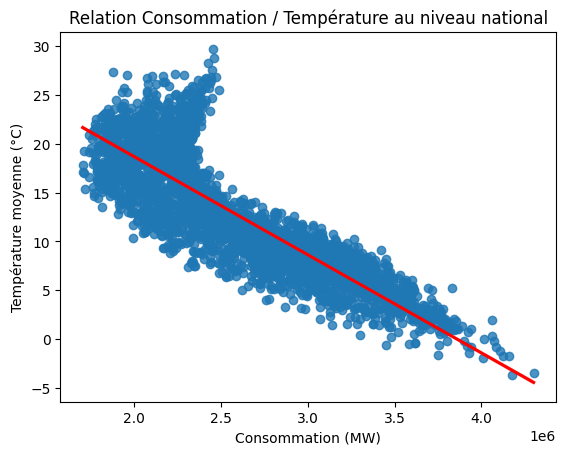

In [ ]:
sns.regplot(x='Consommation (MW)', y='Température moyenne (°C)', data=df_ct, line_kws={"color": "red"})
plt.title('Relation Consommation / Température au niveau national');

**La corrélation entre la Consommation nationale et la Température :**

<ipython-input-60-f43d244a74f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = df_ct.corr()


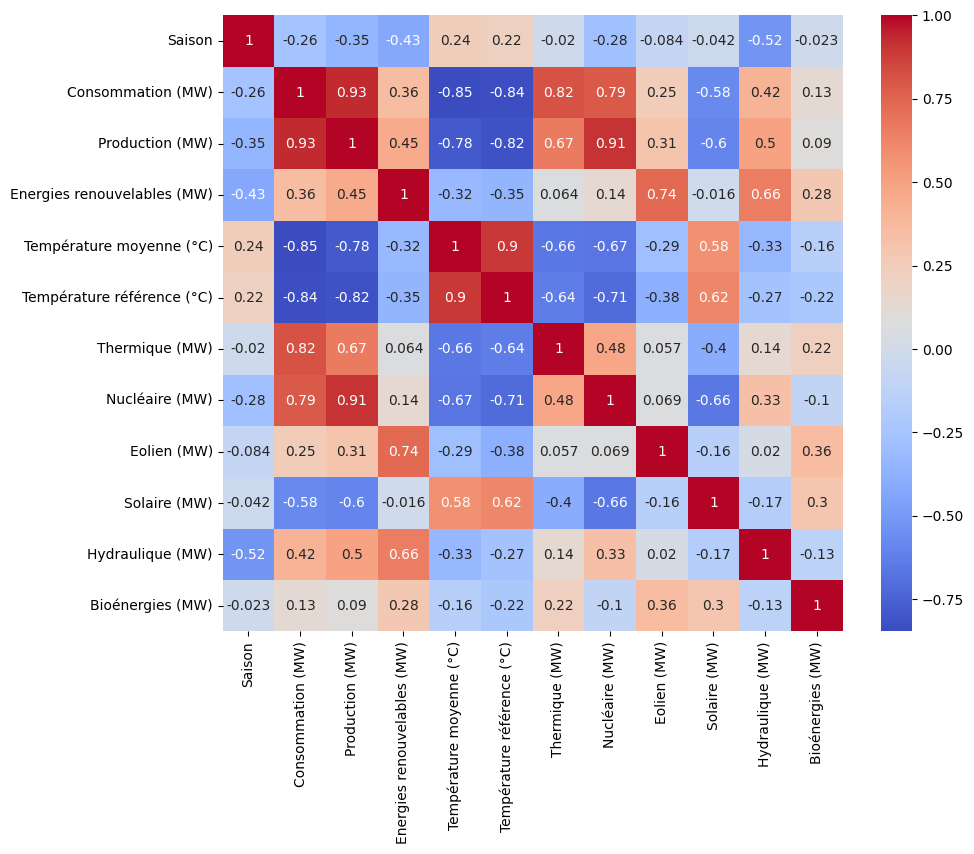

In [ ]:
matrice = df_ct.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=matrice, ax=ax, annot=True, cmap='coolwarm');

**Evolution de la Consommation en fonction de la Température :**

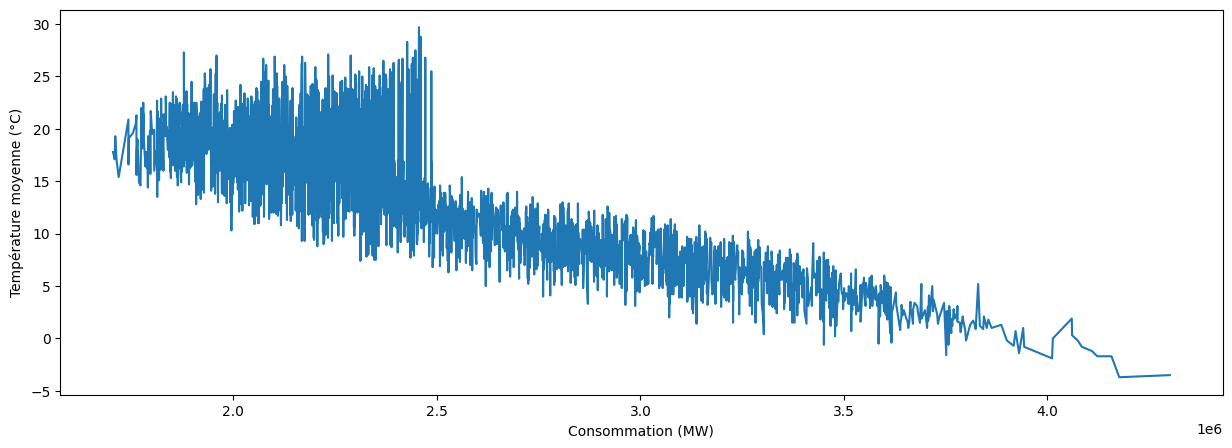

In [ ]:
df_ct['Année'] = pd.to_datetime(df_ct['Année'], yearfirst=True)
conso_nat = df_ct.groupby('Année').agg({'Consommation (MW)' : 'sum'})
temp_nat = df_ct.groupby('Année').agg({'Température moyenne (°C)' : 'sum'})
plt.figure(figsize=(15,5))
sns.lineplot(x='Consommation (MW)', y='Température moyenne (°C)', data=df_ct)

plt.show()

**Vérification des valeurs abérantes dans le jeu de données Température :**

<Axes: >

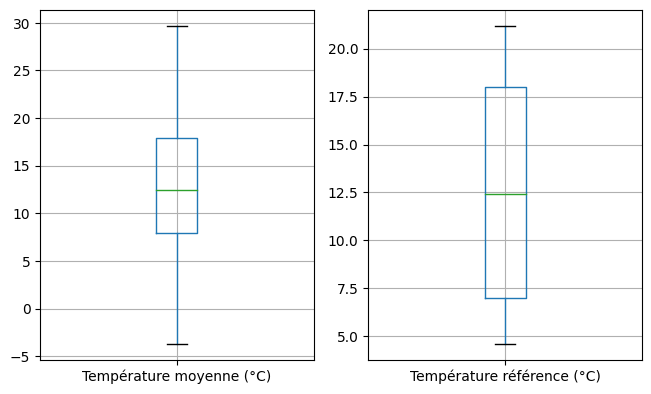

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
df_ct.boxplot('Température moyenne (°C)')

plt.subplot(232)
df_ct.boxplot('Température référence (°C)')

**Comparaison consommation / saison**

---



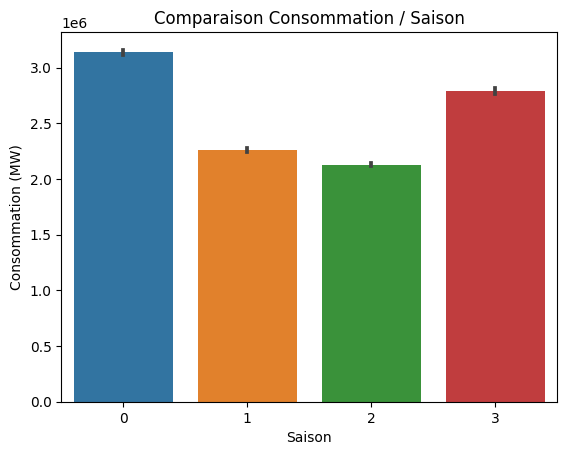

In [ ]:
sns.barplot(x='Saison', y='Consommation (MW)', data=df_ct, )
plt.title('Comparaison Consommation / Saison');

**Exportation de notre fichier nettoyé**

In [68]:
df_ct.to_csv('df_national_nettoye.csv', index=False)
from google.colab import files
files.download('df_national_nettoye.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>